Customer segmentation, becomes pretty useful if we want to keep track of our customers behaviour. In fact before a new marketing campaign, the release of a new ads or product, the customer segmentation might help to find the a better approach for every group (or cluster) of customers found.

Let's take a look at the dataset:


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import os 
data_path = "C:/Users/Orr/Documents/DataScience_2020/Neoland/GITHUB_projects/project/2.Clustering/data"

In [2]:
df = pd.read_csv(data_path+"/Dataset.csv")
df.columns = ["id", "balance", "total_purchase", "max_purchase", "max_installment", "purchase_frequency", "installment_frequency", "credit", "payments", "min_pay", "annuality"]
df.drop("id", axis = 1, inplace = True)

<ins>Glance at the columns<ins>: 

- **Id**:customer identification
- **balance**: balance available in the account
- **total_purchase**: total purchases made by the customer
- **max_purchase**: higher purchase done
- **max_installment** higher installment purchase done
- **purchase_frequency**: purchase frequency of the customer (0 low, 1 high)
- **installment_frequency**: installment frequency of the customer(0 low, 1 high)
- **credit**: credit for the customer
- **payments**: transaction done by the customer
- **min_pay**: minimum payment
- **annuality**: card annuality

In [3]:
df.describe()

,balance,total_purchase,max_purchase,max_installment,purchase_frequency,installment_frequency,credit,payments,min_pay,annuality
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,1025.433874,604.901438,420.843533,0.496000,0.368820,4522.091030,1784.478099,864.304943,11.534391
std,2095.571300,2167.107984,1684.307803,917.245182,0.401273,0.398093,3659.240379,2909.810090,2372.566350,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,6.000000
25%,148.095189,43.367500,0.000000,0.000000,0.083333,0.000000,1600.000000,418.559237,169.163545,12.000000
50%,916.855459,375.405000,44.995000,94.785000,0.500000,0.166667,3000.000000,896.675701,312.452292,12.000000
75%,2105.195853,1145.980000,599.100000,484.147500,0.916667,0.750000,6500.000000,1951.142090,825.496463,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,1.000000,1.000000,30000.000000,50721.483360,76406.207520,12.000000


As we saw in the previous notebook about clustering, in order to improve the use of KMeans algorithm is highly suggested to scale and normalize the values:

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_df = scaler.fit_transform(df)

Since the data we used doesn't need further preprocessing, we can start to search the ideal number of K for our dataset. We can use in this case the Elbow Method or Dendrograms. The first uses the inertia generated by every iteration, while the second join two values based on the specified linkage.

In [5]:
# from scipy.spatial import distance_matrix
# from scipy.cluster import hierarchy
# import pylab 

# dist = distance_matrix(df,df)

# H = hierarchy.linkage(dist, "complete")

# fig, ax = plt.subplots(figsize = (15, 6.5))
# dendro = hierarchy.dendrogram(H)
# plt.show()

In [6]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1,11):
    kmeans = KMeans(k)
    kmeans.fit(norm_df)
    inertia.append(kmeans.inertia_)

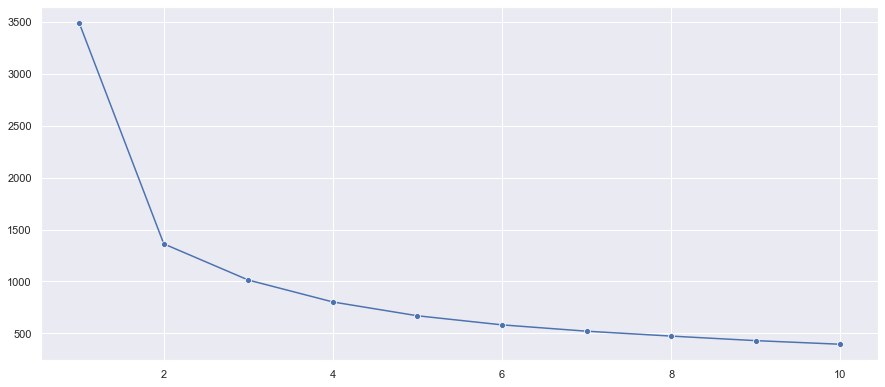

In [7]:
fig, ax = plt.subplots(figsize = (15,6.5))
sns.lineplot(range(1,11), inertia, marker = "o")
plt.show()

The elbow method suggest an ideal k between 4 and 5, since the decrease of inertia in the following iteration is slower. Once find the number of K we repeat the KMeans process.

In [8]:
model = KMeans(n_clusters = 5)
model.fit(norm_df)

KMeans(n_clusters=5)

Extract the predicted labels and the clusters' centers, hence the centroids, and add the values to a DataFrame for better visualization. 

In [9]:
print("Labels: \n{}".format(model.labels_), end = "\n\n")
print("Centroids: \n{}".format(model.cluster_centers_))

Labels: 
[1 1 2 ... 4 3 3]

Centroids: 
[[8.18821728e-02 4.29266698e-02 2.48564826e-02 4.85511120e-02
  9.56609935e-01 9.01772339e-01 1.68583459e-01 4.59540816e-02
  1.32487909e-02 9.89508632e-01]
 [9.82570005e-02 4.65518550e-03 5.10427477e-03 9.03534987e-04
  8.82031702e-02 1.96796617e-02 1.39356858e-01 3.21709750e-02
  1.20891864e-02 9.78178090e-01]
 [7.12423336e-02 2.48630124e-02 2.16269897e-02 1.50292142e-02
  6.30504047e-01 3.17292432e-01 1.61441675e-01 3.32435387e-02
  9.58124495e-03 9.83416667e-01]
 [7.40283877e-02 6.38197561e-03 7.16153429e-03 9.35833333e-04
  1.52576535e-01 2.72676958e-02 1.04992860e-01 1.96366880e-02
  5.95627639e-03 2.46855346e-01]
 [3.92493274e-02 1.56629608e-02 7.12831751e-03 2.12705509e-02
  8.87287844e-01 7.23441670e-01 8.05764237e-02 1.33099246e-02
  5.11512867e-03 2.47106481e-01]]


In [10]:
centr_df = pd.DataFrame(model.cluster_centers_, columns = df.columns)
centr_df.head()

,balance,total_purchase,max_purchase,max_installment,purchase_frequency,installment_frequency,credit,payments,min_pay,annuality
0,0.081882,0.042927,0.024856,0.048551,0.956610,0.901772,0.168583,0.045954,0.013249,0.989509
1,0.098257,0.004655,0.005104,0.000904,0.088203,0.019680,0.139357,0.032171,0.012089,0.978178
2,0.071242,0.024863,0.021627,0.015029,0.630504,0.317292,0.161442,0.033244,0.009581,0.983417
3,0.074028,0.006382,0.007162,0.000936,0.152577,0.027268,0.104993,0.019637,0.005956,0.246855
4,0.039249,0.015663,0.007128,0.021271,0.887288,0.723442,0.080576,0.013310,0.005115,0.247106


Even if all the data are organized per cluster (index = cluster number), the values are still not clear because we're previously normalized them. To have a clearer idea of the values we can use the inverse method in MinMaxScaler.

In [11]:
centr_df = scaler.inverse_transform(centr_df)
centr_df = pd.DataFrame(centr_df, columns = df.columns)
centr_df

,balance,total_purchase,max_purchase,max_installment,purchase_frequency,installment_frequency,credit,payments,min_pay,annuality
0,1559.293563,2105.105430,1013.181303,1092.400020,0.956610,0.901772,5099.074611,2330.906425,1012.308780,11.937052
1,1871.121675,228.288295,208.056620,20.329537,0.088203,0.019680,4223.737906,1631.807495,923.707817,11.869069
2,1356.677629,1219.271435,881.543135,338.157320,0.630504,0.317292,4885.178157,1686.209464,732.085569,11.900500
3,1409.732844,312.969340,291.913090,21.056250,0.152577,0.027268,3194.536164,996.050484,455.115539,7.481132
4,747.430380,768.104861,290.559132,478.587396,0.887288,0.723442,2463.263889,675.147975,390.846648,7.482639


The 5 clusters now indicate 5 different type of customers found in our raw data: 

* **Cluster 0**: a high level of purchase frequency already indicate that the cluster is a good asset, reinforced by a high level of max purchase and total purchase. This cluster should contain those customers who buy a lot and frequently (WEALTHY AND AFFILIATED CUSTOMERS);

* **Cluster 1**: the lowest level of purchase frequency for either standard purchases or with installments and the lowest level of purchases. This cluster contains those customers who rarely buy, even if the balance is high the outcomes are low (ACTIVE FRUGAL CUSTOMERS);

* **Cluster 2**: the standard cluster. The frequency is average for both type of purchases, exactly like the balance. However the transactions done are more active and expensive than cluster 1 or 3;(STANDARD AFFILIATED CUSTOMER )

* **Cluster 3**: as for the cluster 1, this cluster is characterized by low frequency and cheap transactions, lower than cluster 1 however the annuality is about the half (STALLED FRUGAL CUSTOMER).

* **Cluster 4**: the second best cluster, in this case the customers included have high frequency but less liquidity than customer 0, those customers buy frequently but spending limited amount (AFFILIATED CUSTOMERS WITH LOW LIQUIDITY).
